# Postprocessing Notebook for IDSM2

In [11]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [12]:
df = pd.read_csv("./simulations/tb_idsm2_5.txt", sep='\s+')

In [13]:
df

,time,x1.vout1,x1.vout2,dout,x1.p1,x1.p2
0,1.000000e-12,0.8872,0.8459,0.01913,0.6764,0.809800
1,1.000000e-12,0.8873,0.8459,0.01913,0.6764,0.809800
2,1.001000e-12,0.8873,0.8460,0.01913,0.6764,0.809700
3,1.002000e-12,0.8875,0.8462,0.01914,0.6762,0.809500
4,1.005000e-12,0.8878,0.8467,0.01915,0.6757,0.809000
...,...,...,...,...,...,...
72596,2.200000e-06,0.5230,0.4240,1.20000,1.2000,0.000008
72597,2.200000e-06,0.5230,0.4239,1.20000,1.2000,0.000008
72598,2.200000e-06,0.5230,0.4239,1.20000,1.2000,0.000008
72599,2.200000e-06,0.5230,0.4238,1.20000,1.2000,0.000008


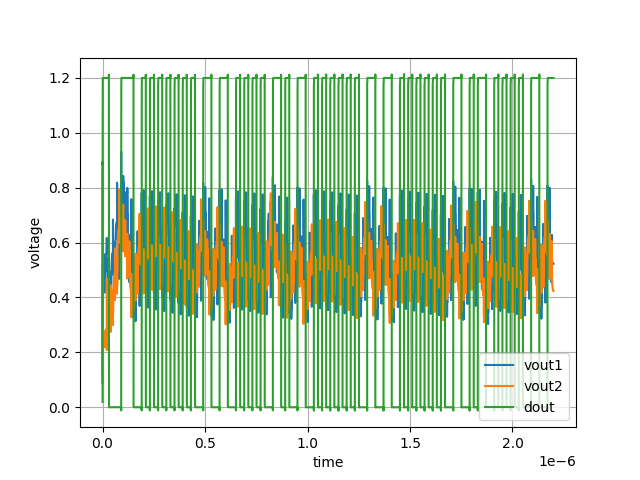

In [14]:
plt.figure(1)
plt.clf()
plt.plot(df['time'], df['x1.vout1'], label="vout1")
plt.plot(df['time'], df['x1.vout2'], label="vout2")
plt.plot(df['time'], df['dout'], label="dout")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [15]:
nfiles = 11
vin = np.arange(0.35, 0.86, 0.05)
vfs = 0.6
vmid = 0.6
per = 20e-9
tstart = 20e-9
N = 110
out = np.zeros([nfiles, N])
for i in range(nfiles): 
  file = "./simulations/tb_idsm2_" + str(i+1) + ".txt"
  df = pd.read_csv(file, sep='\s+')
  dout = df['dout']
  t = df['time']
  ts = np.arange(tstart, tstart+N*per, per)
  interp_func = interp1d(t, dout)
  dsamp = interp_func(ts)
  dsamp[dsamp > 0.6] = 1
  dsamp[dsamp < 0.6] = 0
  csum = np.cumsum(dsamp)
  out[i,:] = vmid-vfs/2 + np.cumsum(csum)*2.0/N/(N+1)*vfs

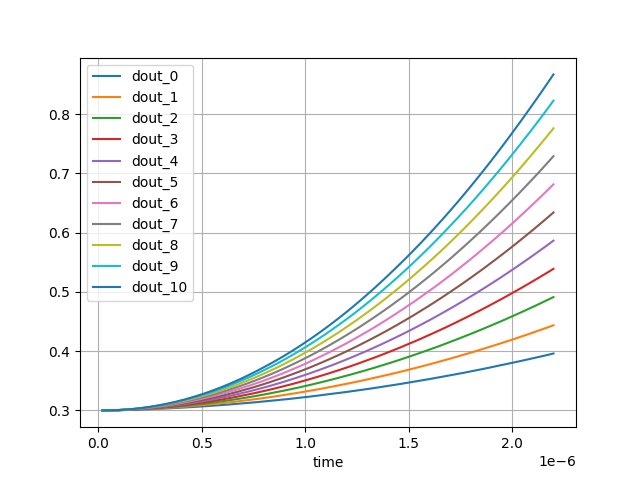

In [16]:
plt.figure(2)
plt.clf()
for i in range(nfiles):
  plt.plot(ts, out[i,:], label="dout_"+str(i))
plt.xlabel("time")
plt.legend(loc="upper left")
plt.grid()
plt.show()

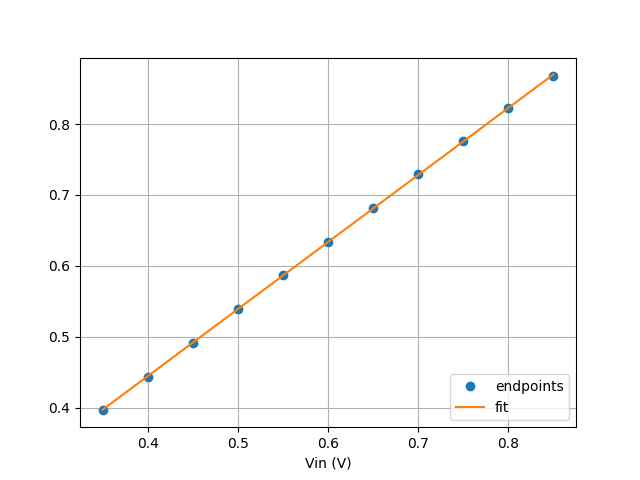

In [17]:
endpoints=(out[:,-1])
coef = np.polyfit(vin ,endpoints,1)
fit = np.poly1d(coef)
plt.figure(3)
plt.clf()
plt.plot(vin, endpoints, 'o', label="endpoints")
plt.plot(vin, fit(vin), label="fit")
plt.xlabel("Vin (V)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

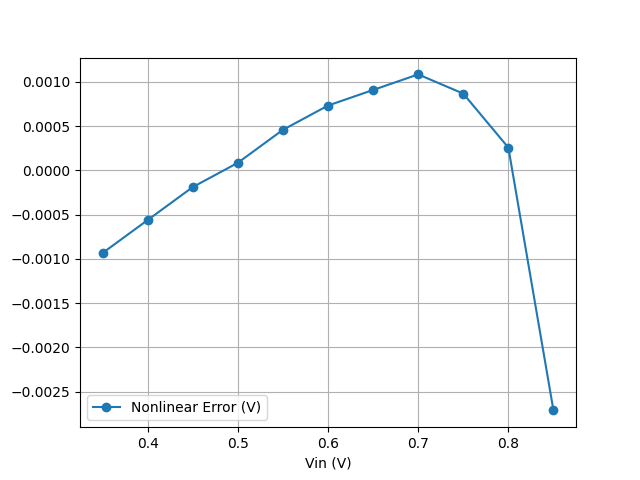

In [18]:
err = endpoints-fit(vin)
plt.figure(4)
plt.clf()
plt.plot(vin, err, 'o-', label="Nonlinear Error (V)")
plt.xlabel("Vin (V)")
plt.legend(loc="lower left")
plt.grid()
plt.show()